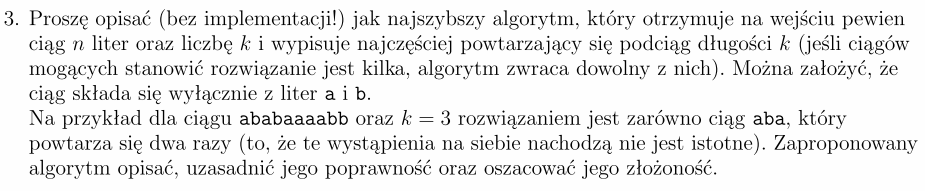

# I Sposób
### Złożoność $ O(n) $ (przy założeniu, że program napisany jest w C++)

Ponieważ to kolokwium było pisane w latach, gdy używany był język programowania C++, w którym możliwe jest zaalokowanie tablicy w czasie jednostkowym, bez inicjalizacji wartości, w poniższym rozwiązaniu zakładam, że jesteśmy w stanie podobnie uczynić w Pythonie i zaalokować tablicę długości $ n $ w czasie $ O(1) $ (a nie $ O(n) $, jak ma to miejsce w rzeczywistości). Ponieważ w rozwiązaniu również nie jest powiedziane nic na temat ograniczeń złożoności pamięciowej, zakładam, że możliwe jest utworzenie tablicy wielkości $ d^k $, gdzie $ k $ - długość szukanego podciągu, $ d $ - liczba znaków w alfabecie.

In [1]:
def lcs(string, min_char, max_char, k: 'length of a substring'):
    if k > len(string) or k == 0: return None
    if k == len(string): return string
    
    min_ord = ord(min_char)
    max_ord = ord(max_char)
    alphabet_length = (max_ord - min_ord + 1)
    
    code_limit = alphabet_length ** k
    # Use None to imitate not initialized value
    counters = [None] * code_limit
    
    # A helper function to encode substrings
    def encode_substring(prev_code, new_char):
        return (prev_code * alphabet_length + (ord(new_char) - min_ord)) % code_limit
    
    curr_code = 0
    # Handle the first (k-1)-letter substring
    for i in range(k - 1):
        curr_code = encode_substring(curr_code, string[i])
    
    # Store a code of (k-1)-element substring in order to improve performance later
    start_code = curr_code
    # At first, fill appropriate array cells with zeros in which counters
    # of the substrings will be stored
    for i in range(k - 1, len(string)):
        curr_code = encode_substring(curr_code, string[i])
        counters[curr_code] = 0
        
    # Loop again and increment proper counters
    curr_code = start_code
    max_reps = 0
    max_reps_idx = k - 1
    for i in range(k - 1, len(string)):
        curr_code = encode_substring(curr_code, string[i])
        counters[curr_code] += 1
        if counters[curr_code] > max_reps:
            max_reps = counters[curr_code]
            max_reps_idx = i
            
#     print(max_reps)
#     print(counters)
            
    # Retore the string which was repeated most times
#     substr = []
#     for i in range(max_reps_idx - k + 1, max_reps_idx + 1):
#         substr.append(string[i])
#     return ''.join(substr)
    return string[max_reps_idx - k + 1 : max_reps_idx + 1]  # Does the same as a loop above

###### Kilka testów

In [2]:
string = 'ababaaaabb'
k = 3

print(lcs(string, 'a', 'b', 3))

aba


In [3]:
string = 'abbcadbaffbdeefbaffdbadadabaffff'
k = 2

print(lcs(string, 'a', 'f', 4))

baff


# II Sposób
### Złożoność $ O(n \cdot log(n)) $ (bez dodatkowych założeń)

Ten sposób możliwy jest do wykorzystania również w języku Python. Polega on na utworzeniu tablicy zakodowanych (przekształconych na liczby) spójnych podciągów, a następnie jej posortowaniu. Ponieważ liczby mogą być bardzo duże oraz nie znamy ich rozkładu, możemy wykorzystać Quick Sorta lub ewentualnie Bucket Sorta z Quick Sortem dla dużych wiaderek i Insertion Sortem dla małych. Ostatnim krokiem jest przejście liniowe (w czasie $ O(n - k + 1) = O(n - k) $, bo $ n $ to liczba znaków w ciągu tekstowym, a $ k $ - długość podciągów, więc mamy razem $ n - k + 1 $ możliwych spójnych podciągów o długości $ k $) po tablicy posortowanych kodów i znalezienie tego, który występuje największą liczbę razy, a następnie odkodowanie zakodowanego fragmentu (przekształcenie liczby spowrotem na tekst). Można oczywiście do tablicy z kodami wrzucić pary postaci (kod fragmentu, indeks końcowy zakodowanego fragmentu), żeby nie było konieczne dekodowanie zakodowanego fragmentu, ale jedynie przejście po tablicy i zwrócenie jej odpowiedniego fragmentu, jednakże przechowywanie par wartości wymusza konieczność przerobienia funkcji sortującej i wymaga 2x więcej pamięci.

In [4]:
def lcs(string, min_char, max_char, k: 'length of a substring'):
    if k > len(string): return None
    if k == 0: return ''
    if k == len(string): return string
    
    min_ord = ord(min_char)
    max_ord = ord(max_char)
    alphabet_length = (max_ord - min_ord + 1)
    code_limit = alphabet_length ** k
    
    # A helper function to encode substrings
    def encode_substring(prev_code, new_char):
        return (prev_code * alphabet_length + (ord(new_char) - min_ord)) % code_limit
    
    # A helper function to decode a substring
    def decode_substring(string_code):
        decoded = []
        for _ in range(k):
            string_code, char_ord = divmod(string_code, alphabet_length)
            decoded.append(chr(char_ord + min_ord))
        # Reverse an array of characters (as they are stored in a reversed order)
        for i in range(len(decoded) // 2):
            _swap(decoded, i, len(decoded) - i - 1)
        return ''.join(decoded)
    
    curr_code = 0
    # Encode the first (k-1)-letter substring
    for i in range(k - 1):
        curr_code = encode_substring(curr_code, string[i])
    
    encoded = []
    # At first, fill appropriate array cells with zeros in which counters
    # of the substrings will be stored
    for i in range(k - 1, len(string)):
        curr_code = encode_substring(curr_code, string[i])
        encoded.append(curr_code)
           
    # Find most common value
    most_common = find_most_common(encoded)
    
#     print(most_common)
#     print(encoded)
    
    return decode_substring(most_common)


def find_most_common(arr):
    # Sort an array of codes in order to find the most frequent value
    quick_sort(arr)
    
    most_common = arr[0]
    most_common_count = 1
    # Find the most common value and decode a substring
    i = 1
    while i < len(arr):
        curr_count = 1
        # Skip repeated values and increment a counter
        while i < len(arr) and arr[i] == arr[i-1]:
            i += 1
            curr_count += 1
        # Check if a current value is more common than a previous most common one
        if curr_count > most_common_count:
            most_common_count = curr_count
            most_common = arr[i-1]
        # Advance a pointer
        i += 1
    return most_common


def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position  # I removed a tailing recursion
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater or equal to a pivot 
    # (in this partition algorithm pivot isn't placed on a fixed position 
    # but can be also swapped like all the remaining values)
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [5]:
string = 'ababaaaabb'
k = 3

print(lcs(string, 'a', 'b', 3))  # Poniższa odpowiedź też jest prawidłowa, bo mamy 2 razy podciąg 'aaa'

aaa


In [6]:
string = 'abbcadbaffbdeefbaffdbadadabaffff'
k = 2

print(lcs(string, 'a', 'f', 4))

baff
